# Multiscale views of an Alfvenic slow solar wind:
## 3D velocity distribution functions observed by the Proton-Alpha Sensor of Solar Orbiter

## [Louarn et al., 2021](https://doi.org/10.1051/0004-6361/202141095)


## Only for Google Colab users:

In [ ]:
%pip install --upgrade ipympl speasy

In [ ]:
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    print("Not running inside Google Collab")

## For all users:

In [ ]:
import speasy as spz
%matplotlib widget
# Use this instead if you are not using jupyterlab yet
#%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from datetime import datetime, timedelta



Define the observation dates

In [2]:
start = "2020-07-14T10:00:00"
stop  = "2020-07-15T06:00:00"

## Magnetic field data
Magnetic field measurements are stored under the `amda/solo_b_rtn_hr` parameter. We save the `SpeasyVariable` object as `b_rtn_hr` for later use.

In [10]:
b_rtn_hr:spz.SpeasyVariable = spz.get_data("amda/solo_b_rtn_hr", start, stop)

We can easily check the data by using the `SpeasyVariable.plot` method.

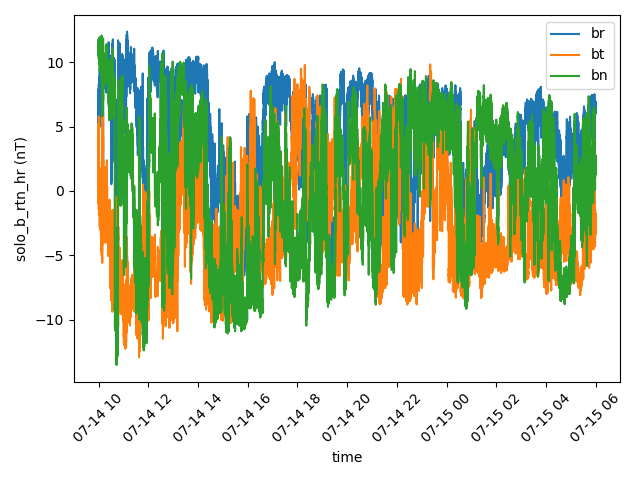

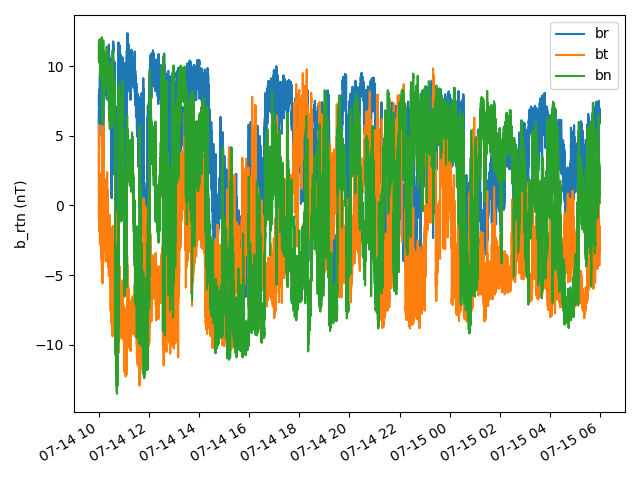

In [5]:
plt.figure()
b_rtn_hr.plot()
plt.tight_layout()
# equivalent to 
b_rtn_hr.to_dataframe().plot(ylabel=f"b_rtn ({b_rtn_hr.unit})")
plt.tight_layout()

Transform the variable to a `pandas.DataFrame` object using the `to_dataframe` method. `to_dataframe` accepts a `datetime_index` argument (default:`False`) indicating if time values should be converted to `datetime` objects.

Let's store the magnetic field in a dataframe called `b_rtn_df`.

In [6]:
b_rtn_df = b_rtn_hr.to_dataframe()
b_rtn_df.describe()

br             bt             bn
count  576009.000000  576009.000000  576009.000000
mean        4.436778      -3.022162       0.313650
std         3.676364       4.013111       5.414090
min        -7.779764     -12.940836     -13.529315
25%         1.998192      -5.914904      -4.331481
50%         4.978280      -3.851054       1.152826
75%         7.296504      -0.396841       4.847765
max        12.380941       9.837873      12.080406

And make the figure a bit more pleasant.

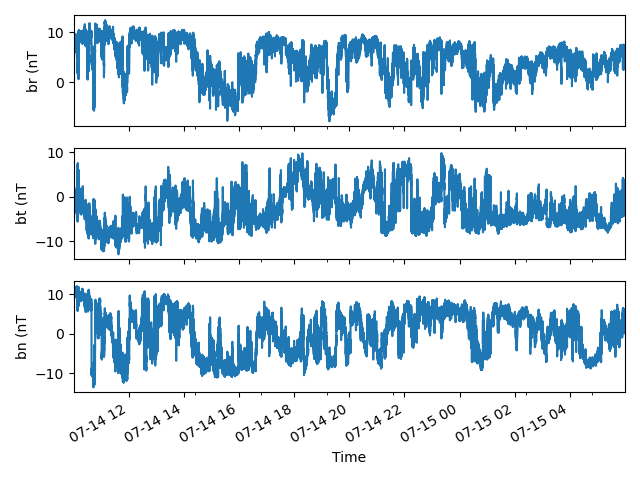

In [7]:
titles = b_rtn_hr.columns
units = b_rtn_hr.unit
fig, ax = plt.subplots(3,1, sharex=True)
for i,name in enumerate(b_rtn_df.columns):
    b_rtn_df[name].plot(ax=ax[i])
    ax[i].set_ylabel(f"{titles[i]} ({units}")
plt.xlim([b_rtn_df.index[0],b_rtn_df.index[-1]])
ax[2].set_xlabel("Time")
plt.tight_layout()

## Velocity data

PAS proton velocity data is available on AMDA and its identifier is `pas_momgr1_v_rtn`. We set the data aside under the `v_rtn` variable.

In [11]:
v_rtn:spz.SpeasyVariable = spz.get_data("amda/pas_momgr1_v_rtn", start, stop)

Create a dataframe object.

In [12]:
v_rtn_df = v_rtn.to_dataframe()
v_rtn_df.describe()

vr            vt            vn
count  27514.000000  27514.000000  27514.000000
mean     426.249600     -6.334826      0.317864
std       17.954962     15.367386     20.181820
min      384.966644    -59.670586    -43.584286
25%      412.822838    -16.342590    -16.186169
50%      424.106384     -3.483476     -2.348698
75%      438.325470      4.522001     16.442065
max      488.915253     29.120104     58.001766

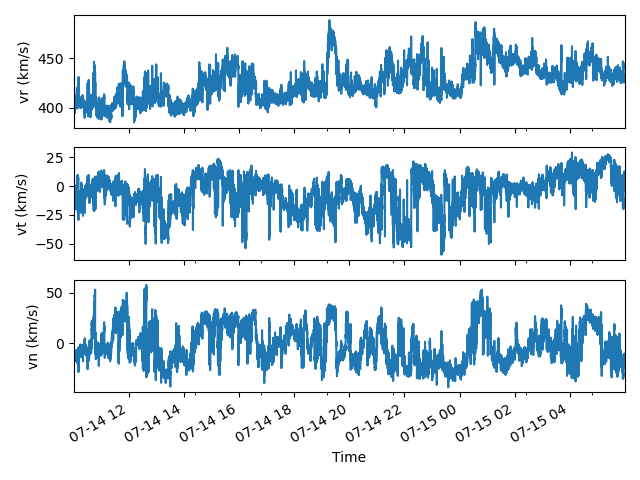

In [13]:
titles = v_rtn.columns
units = v_rtn.unit
fig, ax = plt.subplots(3,1, sharex=True)
for i,name in enumerate(v_rtn_df.columns):
    v_rtn_df[name].plot(ax=ax[i])
    ax[i].set_ylabel(f"{titles[i]} ({units})")
plt.xlim([v_rtn_df.index[0],v_rtn_df.index[-1]])
plt.xlabel("Time")
plt.tight_layout()

## Density

PAS proton density is identified by `pas_momgr_n`.

In [14]:
sw_n:spz.SpeasyVariable = spz.get_data("amda/pas_momgr_n", start, stop)
sw_n_df = sw_n.to_dataframe()
sw_n_df.describe()

density
count  27514.000000
mean      16.025642
std        2.405489
min        5.053784
25%       14.319734
50%       15.890954
75%       17.525525
max       30.859621

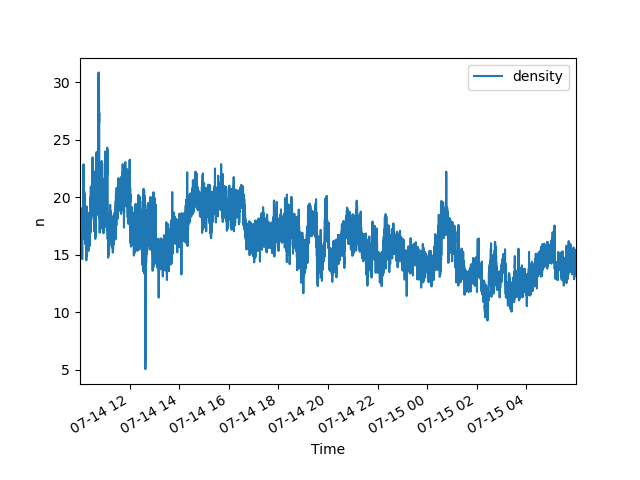

In [16]:
sw_n_df.plot()
plt.xlim([sw_n_df.index[0], sw_n_df.index[-1]])
plt.ylabel("n")
plt.xlabel("Time")
plt.show()

## Proton temperature

Proton temperature is identified by `pas_momgr_tav`.

In [17]:
tav:spz.SpeasyVariable = spz.get_data("amda/pas_momgr_tav", start, stop)
tav_df = tav.to_dataframe()
tav_df.describe()

t_av
count  27514.000000
mean      12.799194
std        2.060786
min        8.017986
25%       11.346625
50%       12.981331
75%       14.296211
max       52.293873

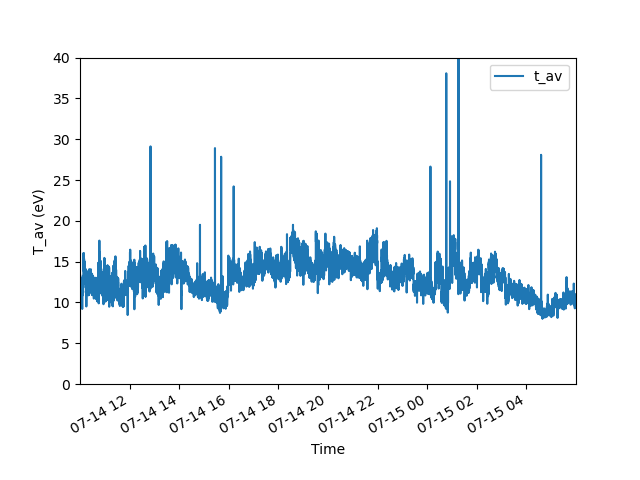

In [18]:
tav_df.plot()
plt.xlabel("Time")
plt.ylabel("T_av (eV)")
plt.xlim([tav_df.index[0], tav_df.index[-1]])
plt.ylim([0,40])
plt.show()

## Proton differential energy flux

Proton differential energy flux is `pas_l2_omni`.

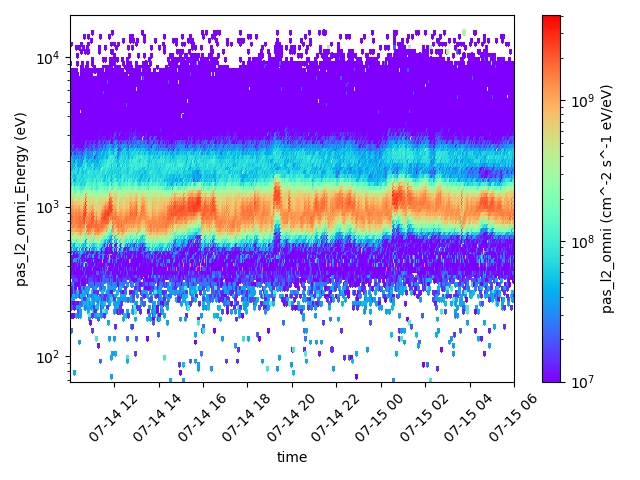

In [19]:
plt.figure()        
pas_l2_omni=spz.get_data("amda/pas_l2_omni", start, stop)
pas_l2_omni.plot(cmap='rainbow', edgecolors="face", vmin=1e7)
plt.tight_layout()

## Correlation of velocity and magnetic field fluctuations

Study of the correlation between `v_rtn` and `b_rtn`. 

We will need to perform operations on data that are not regularly sampled as represented on the figure below.

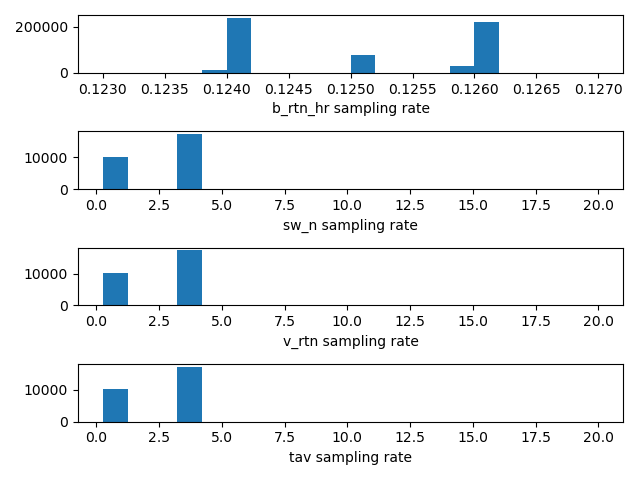

In [20]:
def to_epoch(datetime64_values):
    return (datetime64_values).astype(np.float64)/1e9
    
fig, ax = plt.subplots(4,1)
ax[0].hist(np.diff(to_epoch(b_rtn_hr.time)), bins=20)
ax[0].set_xlabel("b_rtn_hr sampling rate")
ax[1].hist(np.diff(to_epoch(sw_n.time)), bins=20)
ax[1].set_xlabel("sw_n sampling rate")
ax[2].hist(np.diff(to_epoch(v_rtn.time)), bins=20)
ax[2].set_xlabel("v_rtn sampling rate")
ax[3].hist(np.diff(to_epoch(tav.time)), bins=20)
ax[3].set_xlabel("tav sampling rate")
plt.tight_layout()

Resample the data every second. Create a new dataframe object `df_1s` which will contain all the data.

In [21]:
b_rtn_1s = b_rtn_df.resample("1S").ffill()
sw_n_1s = sw_n_df.resample("1S").ffill()
v_rtn_1s = v_rtn_df.resample("1S").ffill()

df_1s = b_rtn_1s.merge(sw_n_1s, left_index=True, right_index=True)
df_1s = df_1s.merge(v_rtn_1s, left_index=True, right_index=True)
df_1s = df_1s.dropna()

df_1s.describe()

br            bt            bn       density            vr  \
count  71996.000000  71996.000000  71996.000000  71996.000000  71996.000000   
mean       4.436458     -3.022399      0.313455     16.235723    425.954116   
std        3.676020      4.012876      5.413990      2.426260     17.762155   
min       -7.641881    -12.710729    -13.472364      5.478008    384.966644   
25%        2.005486     -5.914948     -4.322630     14.484841    412.498413   
50%        4.976464     -3.851966      1.154816     16.096893    424.748138   
75%        7.297559     -0.395437      4.848405     17.809422    437.517120   
max       12.322162      9.772242     11.992266     30.859621    488.915253   

                 vt            vn  
count  71996.000000  71996.000000  
mean      -5.499633     -1.954408  
std       14.873811     18.220244  
min      -59.670586    -43.281979  
25%      -14.777957    -16.209478  
50%       -3.206085     -4.703673  
75%        4.816283     12.270930  
max       29.120104     56.761192

Compute $$b_{\mbox{rtn}} = \frac{ B_{\mbox{rtn}} } { \left( \mu_0 n m_p \right)^{1/2} }$$

The column names `br,bt,bn` are already taken, we will use `b_r,b_t,b_n`.

In [22]:
m_p = 1.67e-27 
mu_0 = 1.25664e-6
# you can also use
#from scipy import constants as cst
#print(cst.m_p, cst.mu_0, cst.Boltzmann)

N = df_1s.shape[0]

b = (df_1s[["br","bt","bn"]].values / 
             (np.sqrt(mu_0*m_p*1e6*df_1s["density"].values.reshape(N,1)))*1e-12)
colnames = ["b_r","b_t","b_n"]

## In case the correction is wrong this worked
#b = (b_rtn_1s[sw_n_1s.index[0]:].values / \
#          (np.sqrt(mu_0 * sw_n_1s.values * 1e6 * m_p) ) *1e-12)

b = pd.DataFrame(data=b, index=df_1s.index, columns=colnames)
df_1s = df_1s.merge(b, right_index=True, left_index=True)
df_1s = df_1s.dropna()

df_1s[["b_r","b_t","b_n"]].describe()

b_r           b_t           b_n
count  71996.000000  71996.000000  71996.000000
mean      24.435180    -16.308684      2.815561
std       19.742385     21.555876     28.862056
min      -39.813521    -64.716665    -68.406051
25%       10.977414    -32.669705    -22.717015
50%       27.979350    -21.045612      6.404938
75%       40.156327     -2.147645     27.531269
max       69.329297     53.754876     81.635840

Compute the fluctuations for the velocity and the magnetic field (1h can be adjusted depending on the event): $$\hat{v} = v - \langle v \rangle_{\mbox{1h}}$$
and $$\hat{b} = b - \langle b \rangle_{\mbox{1h}}$$

<Axes: >

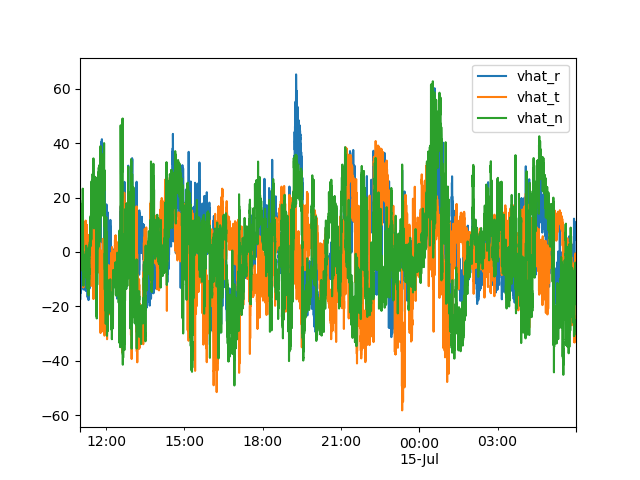

In [23]:
vhat = df_1s[["vr","vt","vn"]] - df_1s[["vr","vt","vn"]].rolling(3600).mean()
colmap = {n1:n2 for n1,n2 in zip(vhat.columns, 
                                 ["vhat_r","vhat_t","vhat_n"])}
vhat = vhat.rename(columns=colmap)
df_1s = df_1s.merge(vhat, right_index=True, left_index=True)
df_1s = df_1s.dropna()

df_1s[["vhat_r","vhat_t","vhat_n"]].plot()

<Axes: >

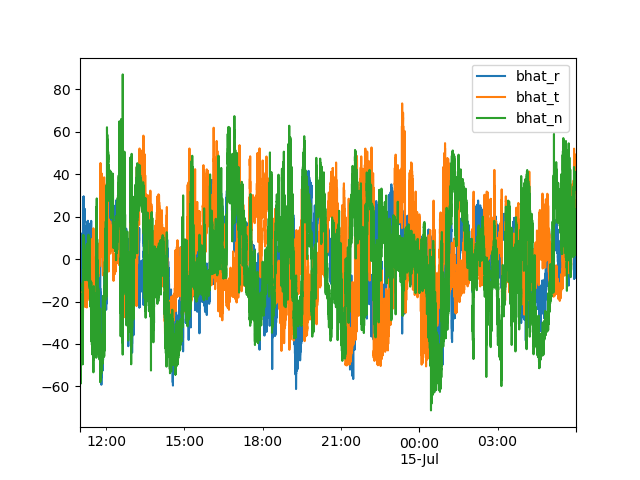

In [24]:
bhat = b - b.rolling(3600).mean()
colmap = {n1:n2 for n1,n2 in zip(bhat.columns, 
                                 ["bhat_r","bhat_t","bhat_n"])}
bhat = bhat.rename(columns=colmap)
df_1s = df_1s.merge(bhat, right_index=True, left_index=True)
df_1s = df_1s.dropna()

df_1s[["bhat_r","bhat_t","bhat_n"]].plot()

(1594756800.0, 1594792800.0)

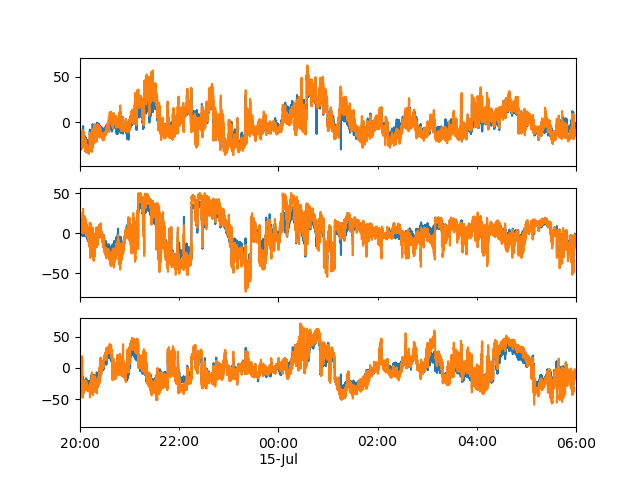

In [25]:
fig, ax = plt.subplots(3,1,sharex=True)
for i in range(3):
    vhat.iloc[:,i].plot(ax=ax[i], label="v")
    (-bhat).iloc[:,i].plot(ax=ax[i], label="b")
t0 = datetime(2020,7,14,20)
plt.xlim([t0, t0+timedelta(hours=10)])

(1594756800.0, 1594792800.0)

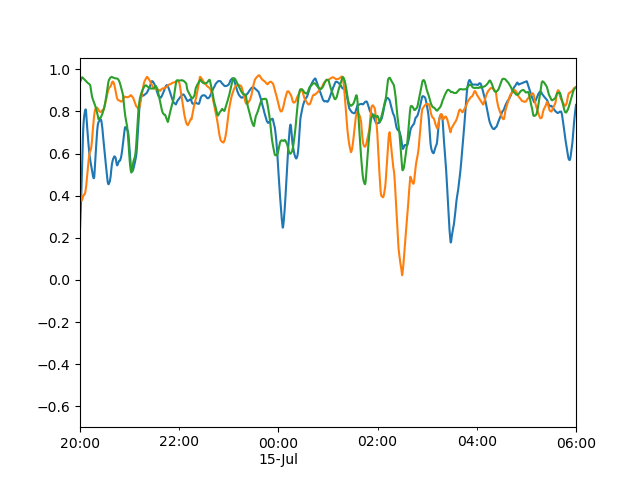

In [26]:
fig, ax = plt.subplots(1,1,sharex=True)
for i in range(3):
    #(-bhat).iloc[:,i].rolling(600).corr(v_rtn_1s.iloc[:,i]).rolling(600).mean().plot(ax=ax)
    (-bhat).iloc[:,i].rolling(600).corr(vhat.iloc[:,i]).rolling(600).mean().plot(ax=ax)
plt.xlim([t0, t0+timedelta(hours=10)])

As a complement, you can also compute the alfvénicity : $$ \sigma=\frac{ 2\hat{b}.\hat{v} }{ (\hat{b}.\hat{b} + \hat{v}.\hat{v}) } $$ and plot it :

In [27]:
alfveniciry = sss=2*(bhat.bhat_r*vhat.vhat_r+bhat.bhat_t*vhat.vhat_t+bhat.bhat_n*vhat.vhat_n)/(bhat.bhat_r*bhat.bhat_r+bhat.bhat_t*bhat.bhat_t+bhat.bhat_n*bhat.bhat_n+vhat.vhat_r*vhat.vhat_r+vhat.vhat_t*vhat.vhat_t+vhat.vhat_n*vhat.vhat_n)

(1594756800.0, 1594792800.0)

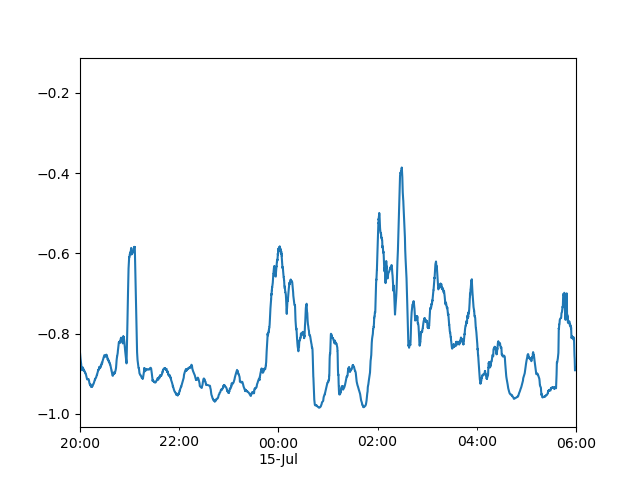

In [28]:
fig, ax = plt.subplots(1,1,sharex=True)
sss.rolling(600).mean().plot(ax=ax)
plt.xlim([t0, t0+timedelta(hours=10)])

## Fourier Transform

Some of the calculations that follow are a bit slow.

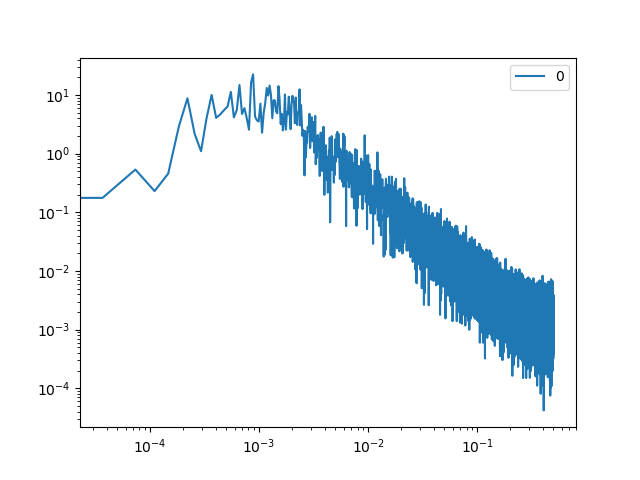

In [29]:
#from numpy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.fft import fft, fftfreq, rfft, rfftfreq

# v rtn
x = v_rtn_df - v_rtn_df.rolling(int(1200 / 4)).mean()
x = x.interpolate()
x = x.dropna()#x.fillna(0)

N = x.shape[0]

sp_v = fft(x.values, axis=0)
sp_v = np.abs(sp_v[:N//2]) * 2./N
sp_v = np.sum(sp_v**2, axis=1)

sp_v_freq = fftfreq(x.shape[0], 1.)
sp_v_freq = sp_v_freq[:N//2]

sp_v = pd.DataFrame(index=sp_v_freq, data=np.absolute(sp_v))
sp_v = sp_v.dropna()

fig, ax = plt.subplots(1,1)
sp_v.plot(ax=ax)

plt.xscale("log")
plt.yscale("log")

The data is noisy and we need to filter it. For each frequency $f$ in the domain we take the mean magnitude over $[(1 - \alpha) f, (1 + \alpha) f [$.
$\alpha$ is set to 4\%

In [30]:
def f(r, x, alpha=.04):
    fmin,fmax = (1.-alpha)*r[0], (1.+alpha)*r[0]
    indx = (x[:,0]>=fmin) & (x[:,0]<fmax)
    if np.sum(indx)==0:
        return np.nan
    return np.mean(x[indx,1])
def proportional_rolling_mean(x, alpha=.04):
    X = np.hstack((x.index.values.reshape(x.index.shape[0],1), x.values))
    Y = np.apply_along_axis(f, 1, X, X)
    return pd.DataFrame(index=X[:,0], data=Y)

Add a linear fit to the the spectrum in the proper frequency range. From Kolmogorov theory we expect a -1.6 spectral index 

Coef : -1.5250478779805297


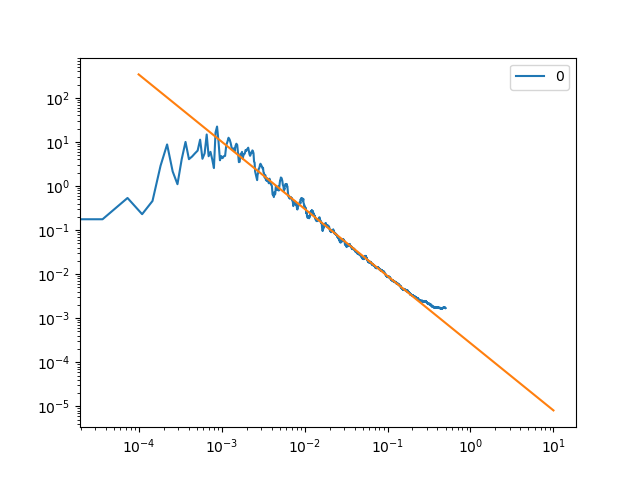

In [31]:
from sklearn.linear_model import LinearRegression
sp_v_mean = proportional_rolling_mean(sp_v)
sp_v_mean = sp_v_mean.bfill()

sp_v_mean.plot()

sp_v_mean_log = pd.DataFrame(data = 
                             np.hstack((np.log(sp_v_mean[1e-3:2e-1].index.values).reshape(sp_v_mean[1e-3:2e-1].shape[0],1),
                                        np.log(sp_v_mean[1e-3:2e-1].values))))
sp_v_mean_log = sp_v_mean_log.replace([np.inf, -np.inf], np.nan)
sp_v_mean_log = sp_v_mean_log.dropna()

# linear regression data
tt = sp_v_mean_log.values[:,0].reshape((-1,1))
xx = sp_v_mean_log.values[:,1].reshape((-1,1))

# fit the linear regression
model = LinearRegression()
model.fit(tt, xx)

print(f"Coef : {model.coef_[0,0]}")

xx = np.log(np.linspace(1e-4, 1e1, 100))
yy = xx*model.coef_[0,0]+model.intercept_[0]
plt.plot(np.exp(xx), np.exp(yy))

plt.xscale("log")
plt.yscale("log")
#plt.xlim([1e-4,1e1])
#plt.ylim([1e-4,1e8])

### Magnetic field FFT

The magnetic field data are sampled at a higher rate (8 Hz) than the velocity (.25 Hz). Let's merge both those parameters into a single dataframe `df_hr`.

In [32]:
df_hr = b_rtn_df.merge(sw_n_df, right_index=True, left_index=True, how="outer")
df_hr = df_hr.interpolate()

# resample the data to a rate of 4Hz
df_hr_8hz = df_hr.resample("125ms").ffill()

# get b
N = df_hr_8hz.shape[0]
b_ = (df_hr_8hz[["br","bt","bn"]].values / 
             (np.sqrt(mu_0*m_p*1e6*df_hr_8hz["density"].values.reshape(N,1)))*1e-12)
colnames = ["b_r","b_t","b_n"]
b_ = pd.DataFrame(data = b_, columns=colnames,index=df_hr_8hz.index)
bhat_ = b_ - b_.rolling(1200*8).mean()
colnames={n1:n2 for n1,n2 in zip(bhat_.columns, ["bhat_r","bhat_t","bhat_n"])}
bhat_=bhat_.rename(columns=colnames)

df_hr_8hz = df_hr_8hz.merge(b_, right_index=True, left_index=True)
df_hr_8hz = df_hr_8hz.merge(bhat_, right_index=True, left_index=True)
df_hr_8hz.describe()


br             bt             bn        density  \
count  575999.000000  575999.000000  575999.000000  575972.000000   
mean        4.436757      -3.022156       0.313615      16.235375   
std         3.676386       4.013093       5.414093       2.412064   
min        -7.779764     -12.940836     -13.529315       5.053784   
25%         1.998236      -5.914867      -4.331347      14.491481   
50%         4.978395      -3.851042       1.152890      16.111278   
75%         7.296612      -0.396753       4.847986      17.776652   
max        12.380941       9.837873      12.080406      30.799139   

                 b_r            b_t            b_n         bhat_r  \
count  575972.000000  575972.000000  575972.000000  566373.000000   
mean       24.436116     -16.305073       2.819573      -0.086668   
std        19.744158      21.552018      28.857625      13.870057   
min       -40.092490     -64.840088     -67.248313     -65.886914   
25%        10.941165     -32.676037     -22.728208      -7.706674   
50%        27.989464     -21.068695       6.383892       0.582921   
75%        40.175065      -2.162044      27.546302       7.786346   
max        69.421091      54.575628      86.514038      54.931340   

              bhat_t         bhat_n  
count  566373.000000  566373.000000  
mean       -0.041386      -0.322127  
std        15.108742      20.535992  
min       -72.876711     -88.599835  
25%        -8.761896     -13.434541  
50%        -0.534475      -0.450718  
75%         9.109271      11.819825  
max        72.324271      87.932526

Compute $b$ FFT.

In [33]:
df_hr_8hz = df_hr_8hz.fillna(0)

In [34]:
# b rtn
x = df_hr_8hz[["bhat_r","bhat_t","bhat_n"]]

sp_b = fft(x.values, axis=0)
sp_b = sp_b[:N//2] * 2./N
sp_b = np.sum(sp_b**2, axis=1)

sp_b_freq = rfftfreq(x.shape[0], .125)
sp_b_freq = sp_b_freq[:N//2]

sp_b = pd.DataFrame(index=sp_b_freq, data=np.absolute(sp_b))

(0.0001, 10.0)

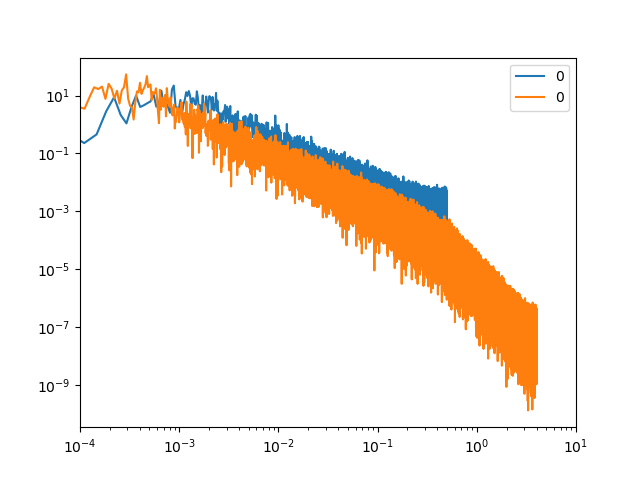

In [35]:
fig, ax = plt.subplots(1,1)
sp_v.plot(ax=ax)
sp_b.plot(ax=ax)
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-4,1e1])

Compute rolling mean.
Warning: This cell can take a couple minutes to execute.

In [36]:
sp_v_rm = proportional_rolling_mean(sp_v)
sp_b_rm = proportional_rolling_mean(sp_b)

Do a linear regression on the magnetic field spectrum for frequencies in $[10^{-3}, 2 \times 10^{-1}]$ and $[2 \times 10^{-1}, 10^1]$.

/tmp/ipykernel_17669/1550647204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_b_rm_log["f"] = np.log(sp_b_rm_log.index)
/tmp/ipykernel_17669/1550647204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_b_rm_log["sp"] = np.log(sp_b_rm[1e-3:2e-1].values)
/tmp/ipykernel_17669/1550647204.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

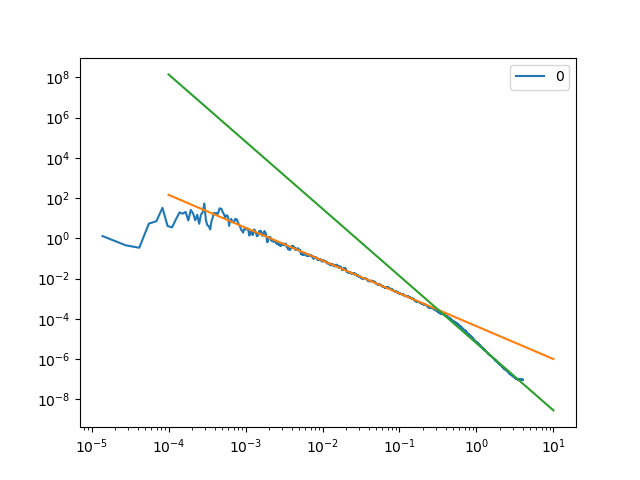

In [37]:
sp_b_rm_log = sp_b_rm[1e-3:2e-1]
sp_b_rm_log["f"] = np.log(sp_b_rm_log.index)
sp_b_rm_log["sp"] = np.log(sp_b_rm[1e-3:2e-1].values)

sp_b_rm_log = sp_b_rm_log.replace([np.inf, -np.inf], np.nan)
sp_b_rm_log = sp_b_rm_log.dropna()


sp_b_rm_log_2 = sp_b_rm[2e-1:]
sp_b_rm_log_2["f"] = np.log(sp_b_rm_log_2.index)
sp_b_rm_log_2["sp"] = np.log(sp_b_rm[2e-1:].values)

sp_b_rm_log_2 = sp_b_rm_log_2.replace([np.inf, -np.inf], np.nan)
sp_b_rm_log_2 = sp_b_rm_log_2.dropna()

# fit the linear regressions
model1 = LinearRegression()
model1.fit(sp_b_rm_log.values[:,1].reshape((-1,1)), 
           sp_b_rm_log.values[:,2].reshape((-1,1)))

model2 = LinearRegression()
model2.fit(sp_b_rm_log_2.values[:,1].reshape((-1,1)), 
           sp_b_rm_log_2.values[:,2].reshape((-1,1)))

xx = np.log(np.linspace(1e-4, 1e1, 100))
yy = xx*model1.coef_[0,0]+model1.intercept_[0]
yy2 = xx*model2.coef_[0,0]+model2.intercept_[0]

sp_b_rm.plot()
plt.plot(np.exp(xx), np.exp(yy))
plt.plot(np.exp(xx), np.exp(yy2))



plt.xscale("log")
plt.yscale("log")

In [38]:
print(model1.coef_[0,0],model2.coef_[0,0])

-1.63289684621718 -3.341639196329613


/tmp/ipykernel_17669/1627177063.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


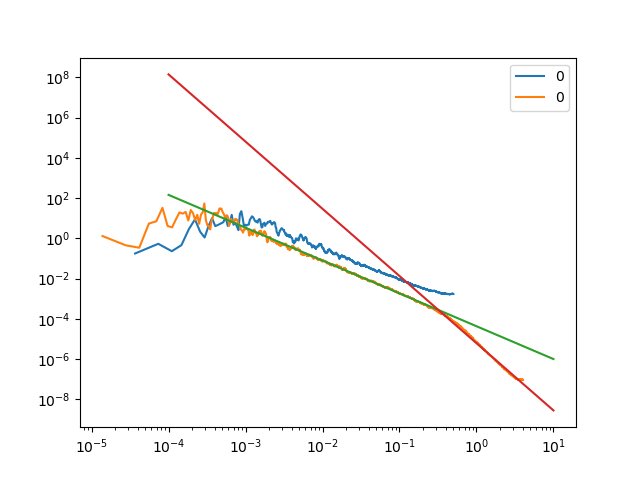

In [39]:
fig, ax = plt.subplots(1,1)
sp_v_rm.plot(ax=ax)
sp_b_rm.plot(ax=ax)
# linear interpolations
plt.plot(np.exp(xx), np.exp(yy))
plt.plot(np.exp(xx), np.exp(yy2))

plt.xscale("log")
plt.yscale("log")
plt.legend()

## Distribution in b-V space

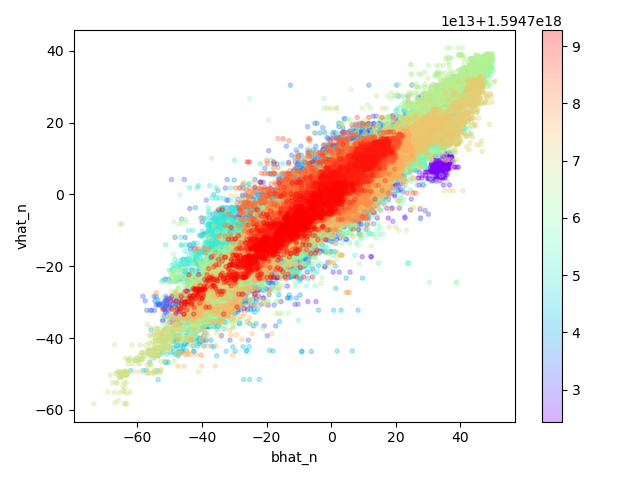

In [40]:
import matplotlib
cmap = matplotlib.cm.rainbow.copy()
cmap.set_bad('White',0.)


fig, ax = plt.subplots(1,1)
coord = "rtn"

cs=ax.scatter(-df_1s["bhat_t"], df_1s["vhat_t"], 
              c=df_1s.index, cmap=cmap, marker=".", alpha=.3)
ax.set_xlabel(f"bhat_{coord[i]}")
ax.set_ylabel(f"vhat_{coord[i]}")
plt.colorbar(cs,ax=ax)
plt.tight_layout()
plt.show()